
# Project: Investigate a Dataset - [No-show appointments dataset]
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I will be investigating and performing analysis on is the NO-SHOW APPOINTMENTS dataset. It is a dataset that contains information of patients in Brazil that scheduled for medical appointment(s) and whether or not they showed up for their scheduled appointment. There are 14 associated variables in this dataset which will help me to conduct an appropraite investigation.

The description of the some of the associated variables include:

Schedule day : the day the patient schedules for medical appointment.

Neighbourhood : this indicates the location of the hospital for the scheduled appointment.

Age: age of the patient for the medical appointment.

Scholarship: this indicates whether or not a patient got into the Bolza family program.

No-show : NO means the patient showed up for the appointment ; YES means the patient did not show up for the appointment.

*For the variables with binary values (0 and 1) : O means NO/NEGATIVE ; 1 means YES/POSITIVE

Bolsa Familia was a social welfare program run by the Brazilian government that was a part of the Fome Zero system of federal aid initiatives. Poor Brazilian families received financial aid from Bolsa Familia. Families had to make sure their children went to school and received their vaccinations in order to qualify.They were withdrawn from the program and had their funding suspended if they went over the permitted number of absences from school.

The questions I plan to explore are:
1. Which Gender visits the doctor the most?
2. Does the nature of the disease affects appointment show-rate?



In [1]:
# importing the necessary packages for my dataset investigation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading my data and Performing operations to inspect data
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# to show the size of my dataframe(number of rows, number of colums)
df_noshow.shape

(110527, 14)

*From the above output it shows that my dataset consists of 110527 rows(data samples) and 14 columns (associated variables/ characteristics)

In [4]:
# statistical description of the dataset
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*From the dataset desciption above, the following are observed:

1. The age group of the dataset is from -1 to 115, with mean age of 37.
2. 32% of patient received SMS regarding their scheduled appointments.
3. 9.8% of patients are on the Bolza scholarship.
4. 19.7% of patient have hypertension
5. Approximately 7.2% of patients have diabetes.
6. 3% of them have alcohol problem.
7. 2.2% of them are handicapped

*From my observations on the percentage mean of the diseases, hipertension is the most common disease among patients that book appointments with an estimate percentage of 20%

In [5]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# to find the number of missing values in a dataset
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# to find the sum of duplicated rows
df_noshow.duplicated().sum()

0

*From the last two(2) output above there are neither missing values in our dataset nor duplicated rows

In [8]:
# this shows how many unique values are in each data characteristics
df_noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning (Replace this with more specific notes!)

*After observing the dataset i will be performing the following cleaning steps on the dataset.
These includes: 
1. Application of uppercase to dataset column names
2. Correction of wrongly spelt column names
3. Change No-show to Showed to remove the unnecessary confusion
4. Adjustment of variable data types
5. Deletion of rows with age less than 0
6. Drop columns are not necessary for my investigation 

In [9]:
# to change the dataset column names to uppercase
df_noshow.columns = df_noshow.columns.str.upper()

In [10]:
# to confirm the change
df_noshow.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HIPERTENSION,DIABETES,ALCOHOLISM,HANDCAP,SMS_RECEIVED,NO-SHOW
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATIENTID       110527 non-null  float64
 1   APPOINTMENTID   110527 non-null  int64  
 2   GENDER          110527 non-null  object 
 3   SCHEDULEDDAY    110527 non-null  object 
 4   APPOINTMENTDAY  110527 non-null  object 
 5   AGE             110527 non-null  int64  
 6   NEIGHBOURHOOD   110527 non-null  object 
 7   SCHOLARSHIP     110527 non-null  int64  
 8   HIPERTENSION    110527 non-null  int64  
 9   DIABETES        110527 non-null  int64  
 10  ALCOHOLISM      110527 non-null  int64  
 11  HANDCAP         110527 non-null  int64  
 12  SMS_RECEIVED    110527 non-null  int64  
 13  NO-SHOW         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# to correct wrongly spelt column names
df_noshow.rename(columns={'HANDCAP' : 'HANDICAP', 'HIPERTENSION' : 'HYPERTENSION'}, inplace=True)

In [13]:
# to confirm the correction above
df_noshow.head(2)

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,NO-SHOW
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [14]:
# to rename 'No-show' column name to 'Showed' and YES = showed

df_noshow.rename(columns = {'NO-SHOW' : 'SHOWED'}, inplace=True)

In [15]:
df_noshow.head(2)

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,SHOWED
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
# to change the 'SHOWED' column data to binary values
df_noshow['SHOWED'] = df_noshow['SHOWED'].apply(lambda x: 1 if x=='No' else 0 )

In [17]:
df_noshow.head(2)

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,SHOWED
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [18]:
# to adjust data types of some column names in the dataset

#to change columns patientid to string
df_noshow['PATIENTID'] = df_noshow['PATIENTID'].apply(int).apply(str)

#to change columns appointmentid to string
df_noshow['APPOINTMENTID'] = df_noshow['APPOINTMENTID'].apply(str)

In [19]:
# to change scheduled day and appointment day from string to datetime datatime
df_noshow.SCHEDULEDDAY = pd.to_datetime(df_noshow.SCHEDULEDDAY)
df_noshow.APPOINTMENTDAY = pd.to_datetime(df_noshow.APPOINTMENTDAY)

In [20]:
# to check the number of days a patient waited before the actual medical appointment
df_noshow["WAITINGDAYS"] = df_noshow["APPOINTMENTDAY"].dt.dayofyear - df_noshow["SCHEDULEDDAY"].dt.dayofyear

In [21]:
df_noshow.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,SHOWED,WAITINGDAYS
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [22]:
#validiating ages variable, drop age < 0
df_noshow.drop(df_noshow[df_noshow['AGE'] < 0].index, inplace = True)

In [23]:
# to confirm the column data types
df_noshow.dtypes

PATIENTID                      object
APPOINTMENTID                  object
GENDER                         object
SCHEDULEDDAY      datetime64[ns, UTC]
APPOINTMENTDAY    datetime64[ns, UTC]
AGE                             int64
NEIGHBOURHOOD                  object
SCHOLARSHIP                     int64
HYPERTENSION                    int64
DIABETES                        int64
ALCOHOLISM                      int64
HANDICAP                        int64
SMS_RECEIVED                    int64
SHOWED                          int64
WAITINGDAYS                     int64
dtype: object

In [24]:
df_noshow.tail()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,SHOWED,WAITINGDAYS
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,1,41


In [25]:
# to drop columns not needed for my analysis
df_noshow.drop(['PATIENTID', 'APPOINTMENTID'], axis=1, inplace=True)

In [26]:
df_noshow.head()

,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,SHOWED,WAITINGDAYS
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


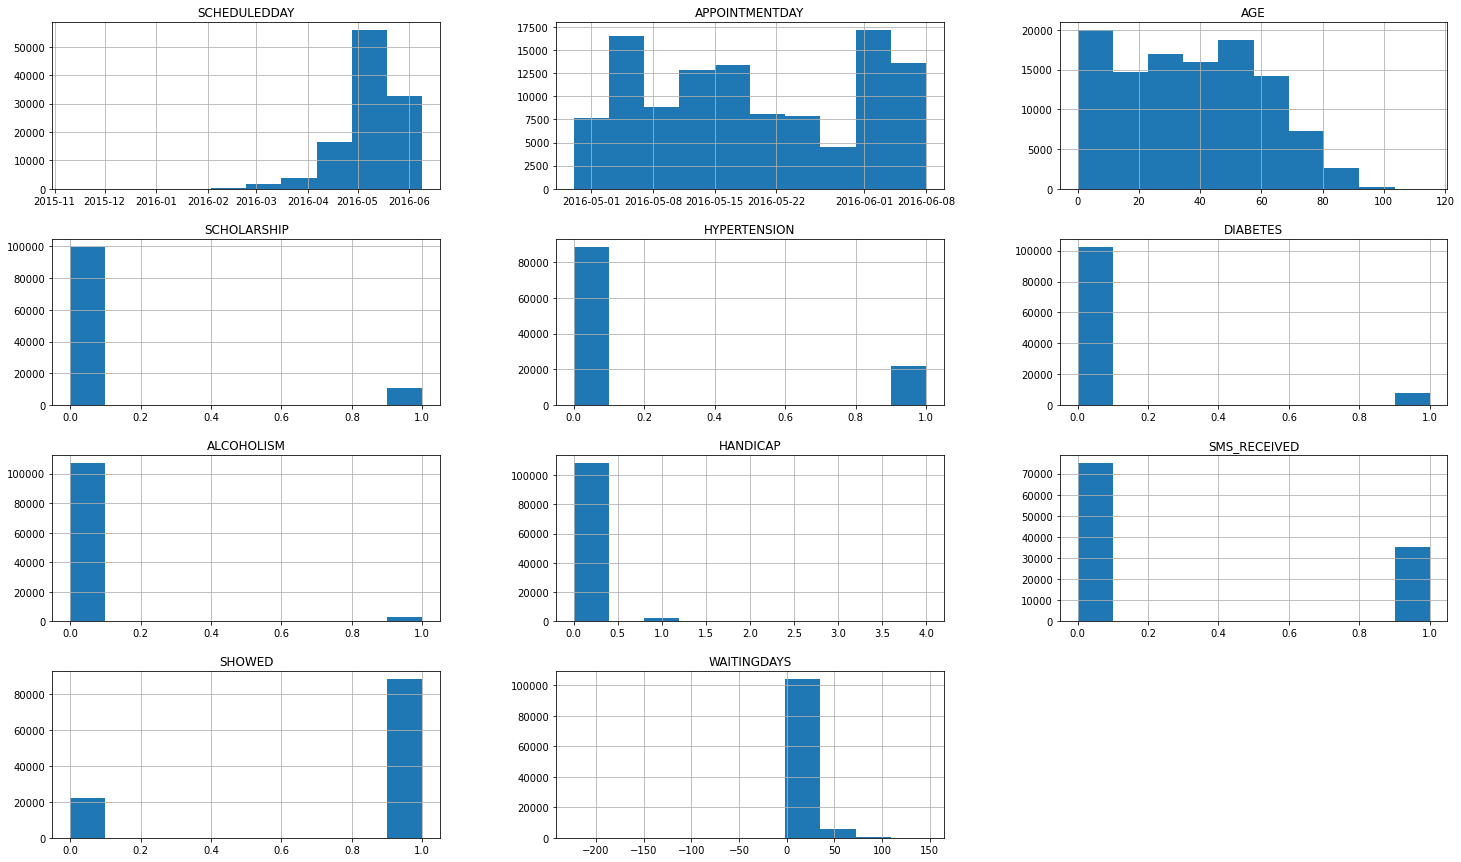

In [27]:
# to show a graphical representation of the associated variables in the dataset using the historgram distribution
df_noshow.hist(figsize=(25,15));

In [28]:
#remove days which are negative
df_noshow.drop(df_noshow[df_noshow.WAITINGDAYS<0].index, axis=0, inplace=True)

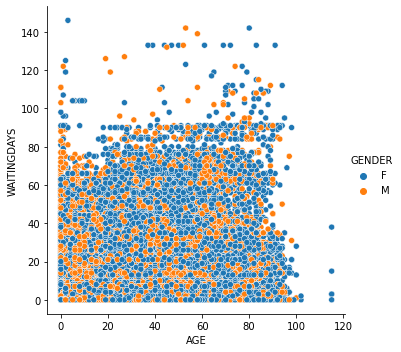

In [29]:
#using the Seaborn Relational Plot (relplot)  to visualise how 'age' and 'waitingdays' are related to each other.
sns.relplot(data=df_noshow, x="AGE", y="WAITINGDAYS", hue="GENDER")

from the relational plot above, it is observed that:
1. more females(blue dots) visit the doctor than the males (orange dots)
2. the waiting days varies strongly between 0 - 80 days irrespective of the gender
3. patient with age >= 100 do not wait as much as age 0 -90 approximately


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which Gender visits the doctor the most?

In [30]:
#to find the ratio of gender that visits the doctor the most

#firstly carry out a gender count
df_noshow.GENDER.value_counts()

F    71791
M    38668
Name: GENDER, dtype: int64

In [31]:
#percentage of male and female in the dataset

print(round(df_noshow.GENDER.value_counts()/len(df_noshow)*100))

F    65.0
M    35.0
Name: GENDER, dtype: float64


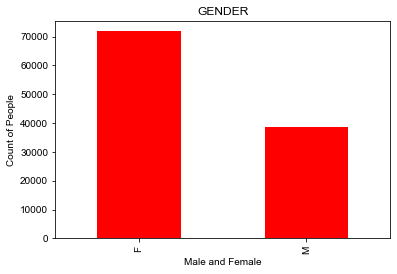

In [32]:
df_noshow.GENDER.value_counts().plot(kind="bar",color="red")
plt.style.use('seaborn')
plt.title("GENDER")
plt.xlabel('Male and Female')
plt.ylabel('Count of People')
plt.show()


The plot above shows that the count of female(F) is over 70000 and that of male is above 37000 

In [33]:
df_noshow.groupby('GENDER').SHOWED.value_counts()

GENDER  SHOWED
F       1         57211
        0         14580
M       1         30953
        0          7715
Name: SHOWED, dtype: int64

In [34]:
#to group by gender and find the mean value of show-rate
df_noshow.groupby('GENDER')['SHOWED'].mean()

GENDER
F    0.796910
M    0.800481
Name: SHOWED, dtype: float64

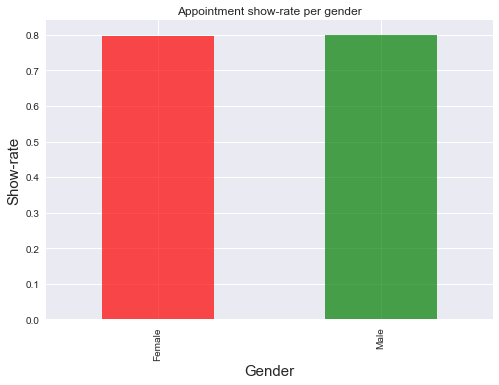

In [35]:
#the show-rate bar chart with one bar for Females (F) and one bar for Males (M).

df_noshow.groupby('GENDER')['SHOWED'].mean().plot(kind='bar', alpha=.7, color=['red', 'green']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Show-rate', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.title('Appointment show-rate per gender');

From the investigation carried out on QUESTION 1: Though by gender count the females are more than males (F:M = 65:35), they both have very close appointment show-rate per gender which is 80%.

### Research Question 2 : Does the nature of the disease affects appointment show-rate?

In [36]:
#investigation how hypertension affects appointment show-rate
df_noshow.groupby('HYPERTENSION')['SHOWED'].mean()

HYPERTENSION
0    0.790997
1    0.827372
Name: SHOWED, dtype: float64

In [37]:
#a function code to plot the show-rate bar chart  of diseases 
#in the dataset of column names with binary value data type
def figure(x):
    df_noshow.groupby([x])['SHOWED'].mean().plot(kind='bar', alpha=.5, color=['green', 'yellow']);
# title and labels
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.title('Appointment show-rate by'+ ' ' + x)
    plt.ylabel('Show-rate', fontsize=15)
    plt.xlabel(x, fontsize=15);
    return figure

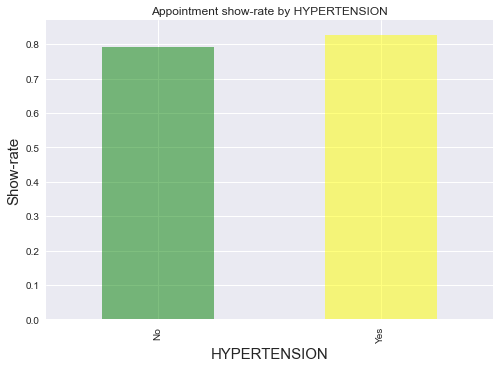

In [38]:
#tp plot the show-rate bar chart with hypertension
HYPERTENSIVE = figure('HYPERTENSION')

The barchat plot above shows that approximately 79% of patients appointment show-rate is not affected by the hypertension, while approximately 83% of patients appointment show-rate is affected.

In [39]:
#investigation how diabetes affects appointment show-rate
df_noshow.groupby('DIABETES')['SHOWED'].mean()

DIABETES
0    0.796479
1    0.819889
Name: SHOWED, dtype: float64

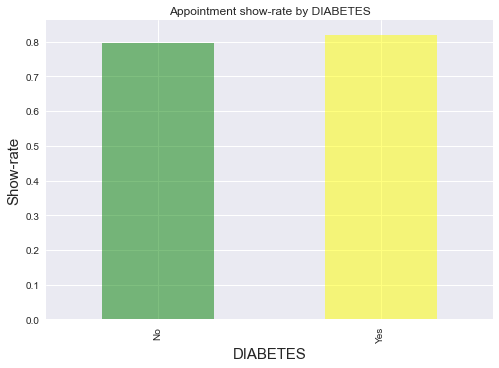

In [40]:
#to plot the show-rate bar chart with diabetes

DIABETIC = figure('DIABETES')

The show-rate bar chart with diabetes above shows that approximately 79% of patients appointment show-rate is not affected by diabetes, while approximately 82% of patients appointment show-rate are affected.

In [41]:
#investigation how alcoholism affects appointment show-rate
df_noshow.groupby('ALCOHOLISM')['SHOWED'].mean()

ALCOHOLISM
0    0.798149
1    0.798512
Name: SHOWED, dtype: float64

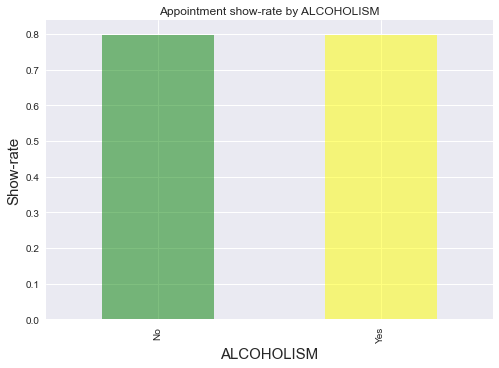

In [42]:
#to plot the show-rate bar chart with alcoholism 
ALCOHOLIC = figure('ALCOHOLISM')

From the appointment show-rate by alcoholism bar-chart plot, the number of patients whose show-rate is affected by alcoholism is equal to those whose show-rate are not affected by alcoholism.

In [43]:
#investigation how being handicapped  affects appointment show-rate
df_noshow.groupby('HANDICAP')['SHOWED'].mean()

HANDICAP
0    0.797707
1    0.822692
2    0.797814
3    0.769231
4    0.666667
Name: SHOWED, dtype: float64

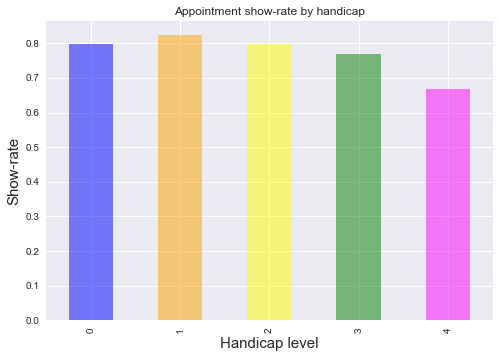

In [44]:
#to know the show-rate bar chart with handicapped patients

df_noshow.groupby('HANDICAP')['SHOWED'].mean().plot(kind='bar', alpha=.5, color=['blue', 'orange', 'yellow', 'green', 'magenta']);

# title and labels
plt.title('Appointment show-rate by handicap');
plt.ylabel('Show-rate', fontsize=15)
plt.xlabel('Handicap level', fontsize=15);

From the handicap plot below:
It is observed that each handicap level has different show-rate.

Level 1 being the most affected with 82% show-rate

Level 0 & Level 2 with approximately 80% show-rate

Level 3 with 76% show-rate

and Level 4 being the least affected with 66% show-rate


### From the investigation carried out on QUESTION 2: 

for hypertension:the difference between patients with this disease whose appoinment show-rate is affected and those that are not affected is 3.6% (i.e 82.7% - 79.1%). 

for diabetes:the difference between patients with this disease whose appoinment show-rate is affected and those that are not affected is 2.4% (i.e 82% - 79.6%).

for alcoholism:the difference between patients with this disease whose appoinment show-rate is affected and those that are not affected is 0.04% (i.e 79.85% - 79.81%).

for handicap:the most affected is the Handicapped Level is Level 1 while the least affected is the Level 4.

It is observed that appointment show-rate is more affected by Hypertension and least affected by Alcoholism.

<a id='conclusions'></a>
## Conclusions

My findings from observation: 
1. The majority of people (80 %) usually show up to scheduled appointment.
2. Females go to the doctor more often than males - 65% of females but 35 % of males.
3. With respect to gender there is no difference in the show up rate to appointment.
4. Among the people scheduled appointment, hypertension is the most common disease - almost 20% are affected by hypertension.
5. Suffering from hypertension or diabetes is asscoiated with slightly higher appointment show rate.

Limitations:
1. Since only three months of the year's worth of data are accessible, the dataset is quite insufficient.
2. There is no information accessible on the appointment hour, which is crucial to investigating the show rate.

<a id='references'></a>
## References
1. https://www.kaggle.com/code/mostafarefaatm/medical-appointment-no-show
2. https://www.kaggle.com/code/syedjaferk/data-visualization-seaborn-no-show-appointment
3. https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000